In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Adjusting the regular expression to handle scientific notation
number_pattern = r'([+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)'

# Function to parse a single line of the file
def parse_line(line):
    numbers = re.findall(number_pattern, line)
    return {
        'epoch': int(numbers[0]),
        'step': int(numbers[1]),
        'train_time': float(numbers[2]),
        'train_acc': float(numbers[3]),
        'test_acc': float(numbers[4]),
        'test_ema_acc': float(numbers[5]),
        'train_nll': float(numbers[6]),
        'test_nll': float(numbers[7]),
        'test_ema_nll': float(numbers[8]),
        'train_loss': float(numbers[9]),
        'train_kl': float(re.search(r'tensor\(\[([+-]?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)\]', line).group(1)),
        'train_ece': float(numbers[10]),
        'test_ece': float(numbers[11]),
        'test_ece_ema': float(numbers[12]),
        'train_nfes': float(numbers[13]),
        'test_nfe': float(numbers[14]),
        'test_nfe_ema': float(numbers[15])
    }

# Function to parse a file and return a DataFrame
def parse_file(file_path):
    results = []
    with open(file_path, 'r') as file:
        for line in file:
            results.append(parse_line(line))
    return pd.DataFrame(results)

# Function to plot metrics
def plot_metrics(df, title_suffix=''):
    plt.figure(figsize=(14, 10))

    # Subplot for Training and Test Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(df['epoch'], df['train_acc'], label='Train Accuracy')
    plt.plot(df['epoch'], df['test_acc'], label='Test Accuracy')
    plt.plot(df['epoch'], df['test_ema_acc'], label='Test EMA Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Test Accuracy {title_suffix}')
    plt.legend()

    # Subplot for Training and Test NLL
    plt.subplot(2, 2, 2)
    plt.plot(df['epoch'], df['train_nll'], label='Train NLL')
    plt.plot(df['epoch'], df['test_nll'], label='Test NLL')
    plt.plot(df['epoch'], df['test_ema_nll'], label='Test EMA NLL')
    plt.xlabel('Epoch')
    plt.ylabel('Negative Log-Likelihood (NLL)')
    plt.title(f'Training and Test NLL {title_suffix}')
    plt.legend()

    # Subplot for Training and Test ECE
    plt.subplot(2, 2, 3)
    plt.plot(df['epoch'], df['train_ece'], label='Train ECE')
    plt.plot(df['epoch'], df['test_ece'], label='Test ECE')
    plt.plot(df['epoch'], df['test_ece_ema'], label='Test EMA ECE')
    plt.xlabel('Epoch')
    plt.ylabel('Expected Calibration Error (ECE)')
    plt.title(f'Training and Test ECE {title_suffix}')
    plt.legend()

    # Subplot for Test NFE
    plt.subplot(2, 2, 4)
    plt.plot(df['epoch'], df['test_nfe'], label='Test NFE')
    plt.plot(df['epoch'], df['test_nfe_ema'], label='Test EMA NFE')
    plt.xlabel('Epoch')
    plt.ylabel('Number of Function Evaluations (NFE)')
    plt.title(f'Test NFE and Test EMA NFE {title_suffix}')
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Function to process multiple files
def process_files(file_paths):
    for file_path in file_paths:
        df = parse_file(file_path)
        plot_metrics(df, title_suffix=f'({file_path})')


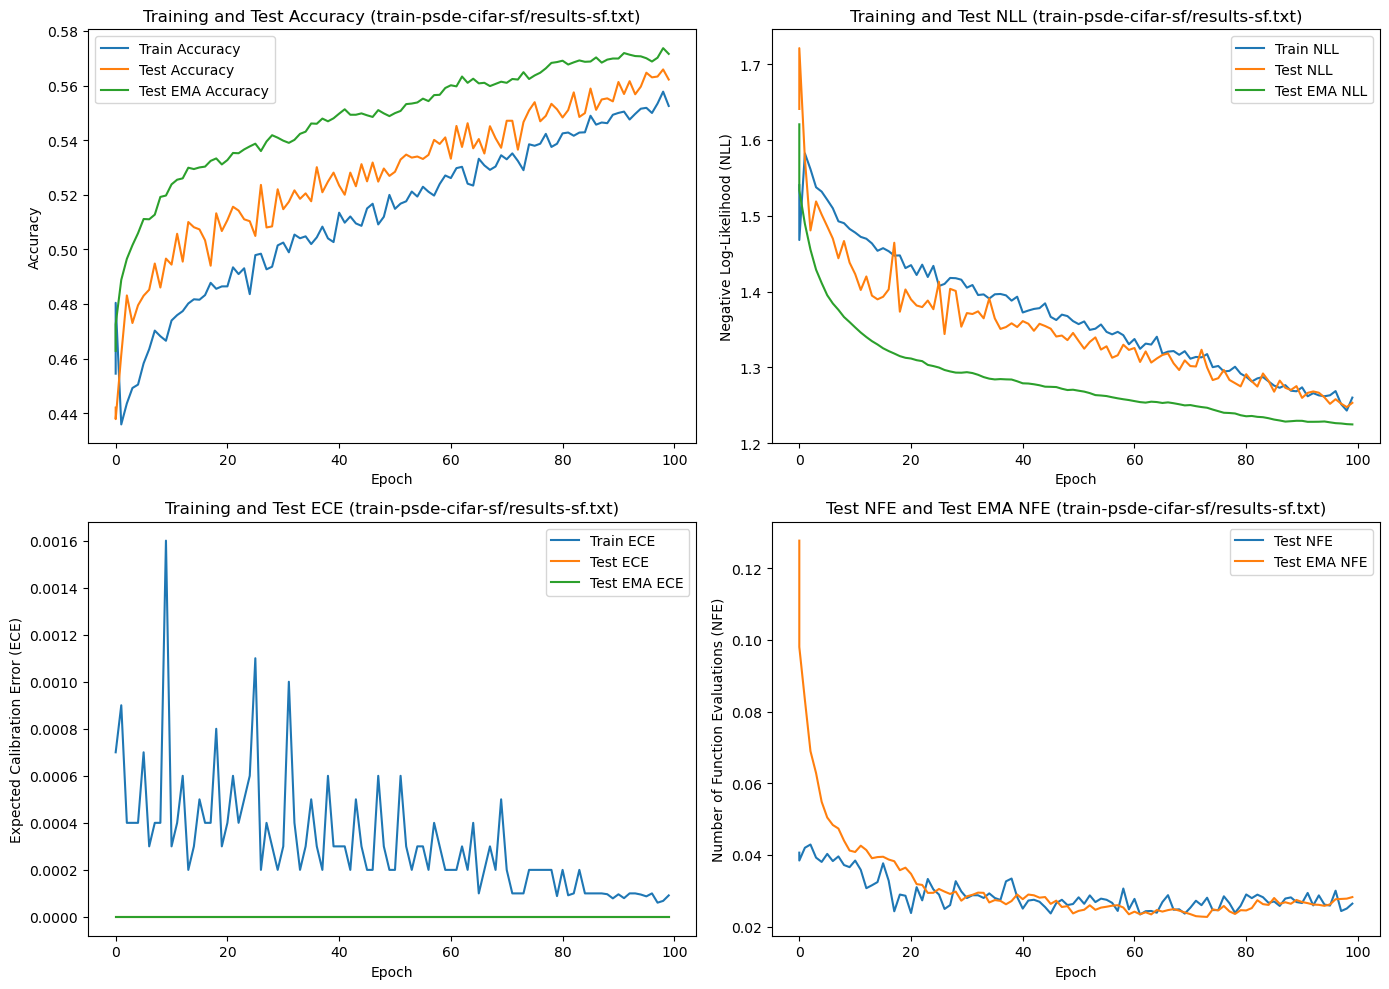

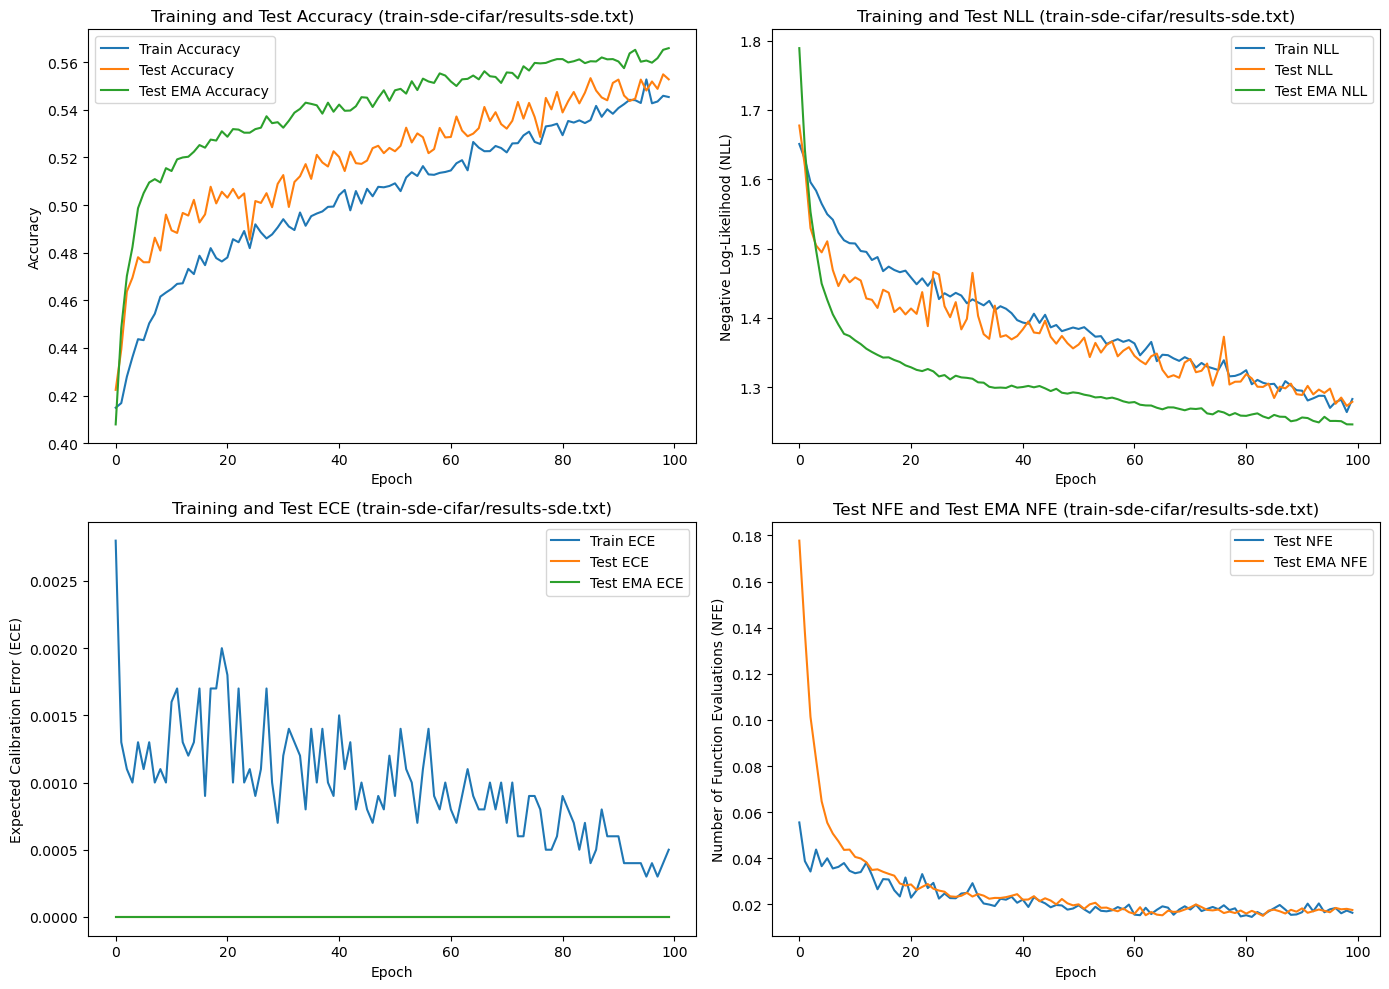

In [4]:
# List of file paths to process
file_paths = [
    'train-psde-cifar-sf/results-sf.txt',
    'train-sde-cifar/results-sde.txt',
    # Add more file paths as needed
]

# Process and plot metrics for all files
process_files(file_paths)